**Теперь рассмотрим сверточную нейронную сеть с остаточными блоками. Протестируем разные варианты глубины на 5 эпохах:**\
**глубина 1 — 1 residual-блок (2 сверточных слоя), глубина 3 — 3 residual-блока (7 сверточных слоев),**\
**глубина 5 — 5 residual-блоков (11 сверточных слоев).**\
**Это позволит оценить влияние глубины остаточной архитектуры на скорость обучения и качество модели.**\
**Графики - "plots\cnn_with_res\depth"**


=== Запуск CNNWithResidual с глубиной 1 ===


100%|██████████| 8/8 [00:01<00:00,  7.42it/s]


Epoch 1/5:
Train Loss: 4.4353, Train Acc: 0.0342
Test Loss: 4.2463, Test Acc: 0.0660
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  7.94it/s]


Epoch 2/5:
Train Loss: 4.1384, Train Acc: 0.0618
Test Loss: 3.9710, Test Acc: 0.0800
--------------------------------------------------


100%|██████████| 8/8 [00:00<00:00,  8.04it/s]


Epoch 3/5:
Train Loss: 3.9748, Train Acc: 0.0723
Test Loss: 3.8541, Test Acc: 0.1120
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  7.49it/s]


Epoch 4/5:
Train Loss: 3.8808, Train Acc: 0.0884
Test Loss: 3.7299, Test Acc: 0.1240
--------------------------------------------------


100%|██████████| 8/8 [00:00<00:00,  8.15it/s]


Epoch 5/5:
Train Loss: 3.8200, Train Acc: 0.1016
Test Loss: 3.6520, Test Acc: 0.1240
--------------------------------------------------
Время обучения для глубины 1: 214.70 секунд


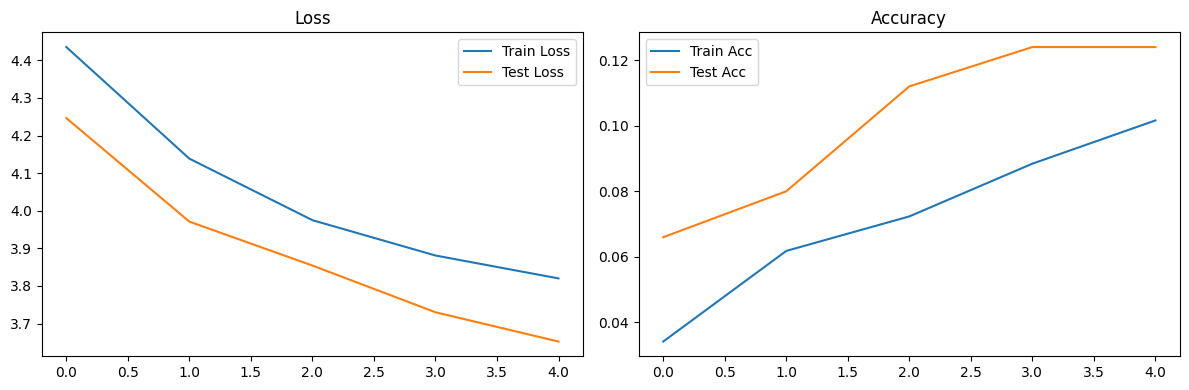


=== Запуск CNNWithResidual с глубиной 3 ===


100%|██████████| 8/8 [00:01<00:00,  7.00it/s]


Epoch 1/5:
Train Loss: 4.0971, Train Acc: 0.0630
Test Loss: 3.6687, Test Acc: 0.1460
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  7.07it/s]


Epoch 2/5:
Train Loss: 3.6662, Train Acc: 0.1221
Test Loss: 3.5141, Test Acc: 0.1500
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  7.05it/s]


Epoch 3/5:
Train Loss: 3.4459, Train Acc: 0.1536
Test Loss: 3.2401, Test Acc: 0.1860
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  6.38it/s]


Epoch 4/5:
Train Loss: 3.3066, Train Acc: 0.1834
Test Loss: 3.0251, Test Acc: 0.2600
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.94it/s]


Epoch 5/5:
Train Loss: 3.1940, Train Acc: 0.2064
Test Loss: 3.0160, Test Acc: 0.2340
--------------------------------------------------
Время обучения для глубины 3: 285.02 секунд


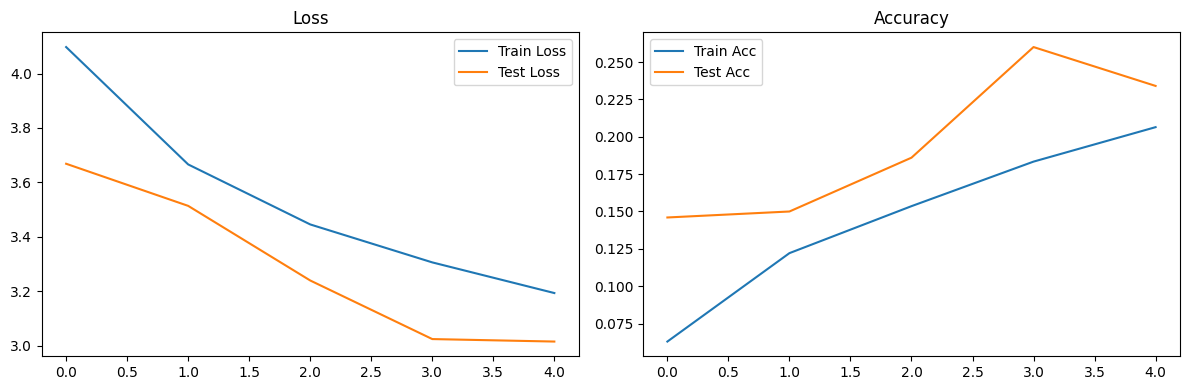


=== Запуск CNNWithResidual с глубиной 5 ===


100%|██████████| 8/8 [00:01<00:00,  5.99it/s]


Epoch 1/5:
Train Loss: 4.0448, Train Acc: 0.0745
Test Loss: 3.6902, Test Acc: 0.1020
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  6.08it/s]


Epoch 2/5:
Train Loss: 3.4890, Train Acc: 0.1454
Test Loss: 3.2115, Test Acc: 0.2020
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  6.08it/s]


Epoch 3/5:
Train Loss: 3.1930, Train Acc: 0.1947
Test Loss: 2.8710, Test Acc: 0.2520
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.70it/s]


Epoch 4/5:
Train Loss: 2.9482, Train Acc: 0.2513
Test Loss: 2.7960, Test Acc: 0.2740
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.76it/s]


Epoch 5/5:
Train Loss: 2.7456, Train Acc: 0.2907
Test Loss: 2.5770, Test Acc: 0.3120
--------------------------------------------------
Время обучения для глубины 5: 335.45 секунд


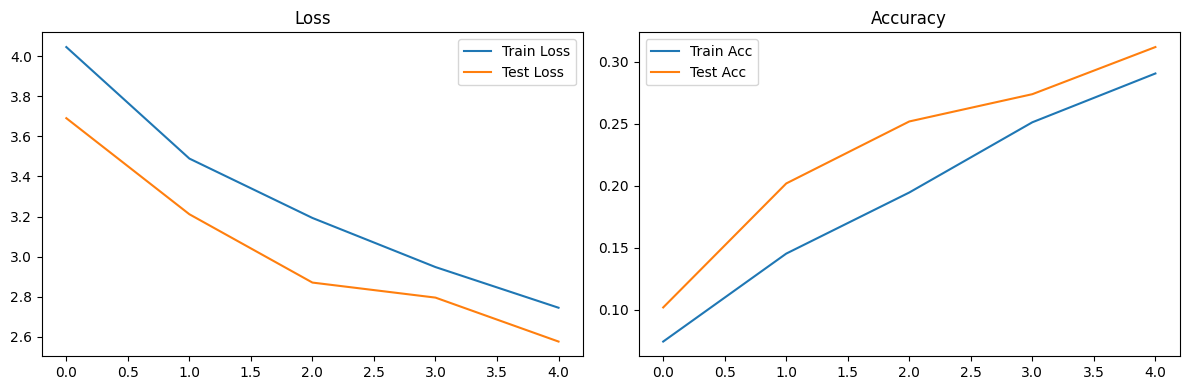

In [2]:
import torch
from torch.utils.data import DataLoader
from dataset import CustomImageDataset
from models import CNNWithResidual
from trainer import train_model
from utils import plot_training_history
import time 

# Настройки
train_root = 'data/train'
test_root = 'data/valid'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 64
epochs = 5
num_classes = 100
kernel_size = 3 

# Датасеты
train_dataset = CustomImageDataset(train_root, is_aug=False)
val_dataset = CustomImageDataset(test_root, is_aug=False)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Цикл по глубинам:
for depth in [1, 3, 5]: #колво остаточных блоков, количество слоев сверток depth*2+1
    print(f"\n=== Запуск CNNWithResidual с глубиной {depth} ===")
    model = CNNWithResidual(input_channels=3, num_classes=num_classes, kernel_size=kernel_size, num_layers=depth).to(device)

    start_time = time.time()

    history = train_model(
        model=model,
        train_loader=train_loader,
        test_loader=val_loader,
        epochs=epochs,
        lr=0.001,  
        device=device
    )

    end_time = time.time()
    tm = end_time - start_time
    print(f"Время обучения для глубины {depth}: {tm:.2f} секунд")

    plot_training_history(history, save_path=f"plots/cnn_with_res/depth/res_with_{depth}depth.png")



**Выбрали оптимальную глубину  равную 11 в общей сумме сверточных слоев, на которой были достигнуты лучшие метрики.**\
**Теперь проведём эксперименты с разными размерами ядра свёртки (3, 5, 7), чтобы определить лучший размера ядра на обучение.Количество эпох - 5.**\
**Графики сохранены в "plots\cnn_with_res\kernel_sizes"**


=== Запуск CNNWithResidual с kernel_size=3, depth=5 ===


100%|██████████| 8/8 [00:01<00:00,  5.85it/s]


Epoch 1/5:
Train Loss: 3.9400, Train Acc: 0.0832
Test Loss: 3.4992, Test Acc: 0.1260
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.92it/s]


Epoch 2/5:
Train Loss: 3.4031, Train Acc: 0.1562
Test Loss: 3.2131, Test Acc: 0.2000
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  6.33it/s]


Epoch 3/5:
Train Loss: 3.0916, Train Acc: 0.2128
Test Loss: 2.7383, Test Acc: 0.2760
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  6.36it/s]


Epoch 4/5:
Train Loss: 2.8608, Train Acc: 0.2645
Test Loss: 2.4891, Test Acc: 0.3660
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.32it/s]


Epoch 5/5:
Train Loss: 2.6345, Train Acc: 0.3085
Test Loss: 2.3493, Test Acc: 0.4140
--------------------------------------------------
Время обучения для kernel_size=3: 331.81 секунд


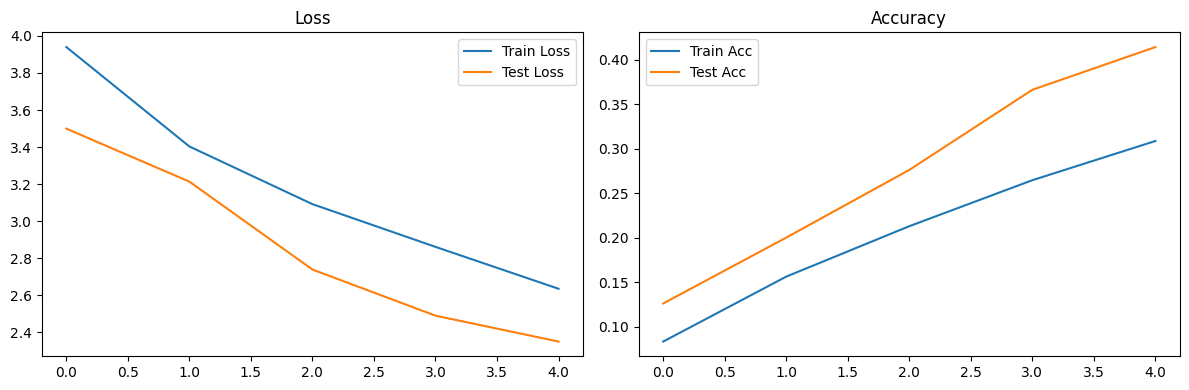


=== Запуск CNNWithResidual с kernel_size=5, depth=5 ===


100%|██████████| 8/8 [00:01<00:00,  5.36it/s]


Epoch 1/5:
Train Loss: 4.0651, Train Acc: 0.0660
Test Loss: 3.6998, Test Acc: 0.1100
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.38it/s]


Epoch 2/5:
Train Loss: 3.5265, Train Acc: 0.1370
Test Loss: 3.2872, Test Acc: 0.1620
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.35it/s]


Epoch 3/5:
Train Loss: 3.1651, Train Acc: 0.1980
Test Loss: 2.9437, Test Acc: 0.2420
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.06it/s]


Epoch 4/5:
Train Loss: 2.9061, Train Acc: 0.2508
Test Loss: 2.6603, Test Acc: 0.3120
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.01it/s]


Epoch 5/5:
Train Loss: 2.6795, Train Acc: 0.3016
Test Loss: 2.4566, Test Acc: 0.3560
--------------------------------------------------
Время обучения для kernel_size=5: 435.20 секунд


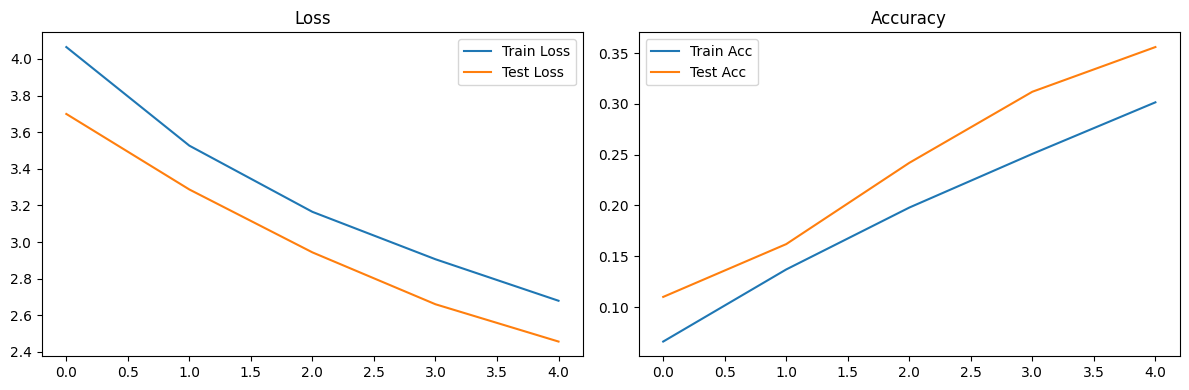


=== Запуск CNNWithResidual с kernel_size=7, depth=5 ===


100%|██████████| 8/8 [00:01<00:00,  4.02it/s]


Epoch 1/5:
Train Loss: 4.1198, Train Acc: 0.0679
Test Loss: 3.8128, Test Acc: 0.0820
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  4.17it/s]


Epoch 2/5:
Train Loss: 3.5745, Train Acc: 0.1281
Test Loss: 3.2558, Test Acc: 0.1720
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  4.49it/s]


Epoch 3/5:
Train Loss: 3.2115, Train Acc: 0.1903
Test Loss: 2.9360, Test Acc: 0.2680
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  4.08it/s]


Epoch 4/5:
Train Loss: 2.9583, Train Acc: 0.2407
Test Loss: 2.7574, Test Acc: 0.3180
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  4.26it/s]


Epoch 5/5:
Train Loss: 2.7073, Train Acc: 0.2981
Test Loss: 2.6516, Test Acc: 0.3360
--------------------------------------------------
Время обучения для kernel_size=7: 601.87 секунд


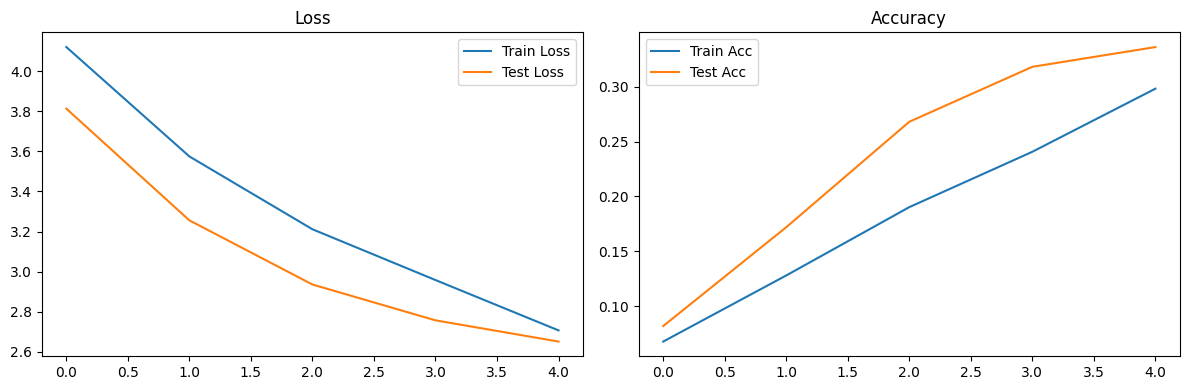

In [ ]:
import torch
from torch.utils.data import DataLoader
from dataset import CustomImageDataset
from models import CNNWithResidual
from trainer import train_model
from utils import plot_training_history
import time

# Настройки
train_root = 'data/train'
test_root = 'data/valid'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 64
epochs = 5
num_classes = 100
depth = 5  

# Датасеты
train_dataset = CustomImageDataset(train_root, is_aug=False)
val_dataset = CustomImageDataset(test_root, is_aug=False)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Цикл по kernel_size:
for kernel_size in [3, 5, 7]:
    print(f"\n=== Запуск CNNWithResidual с kernel_size={kernel_size}, depth={depth} ===")
    model = CNNWithResidual(input_channels=3, num_classes=num_classes, kernel_size=kernel_size, num_layers=depth).to(device)

    start_time = time.time()

    history = train_model(
        model=model,
        train_loader=train_loader,
        test_loader=val_loader,
        epochs=epochs,
        lr=0.001,
        device=device
    )

    end_time = time.time()
    tm = end_time - start_time
    print(f"Время обучения для kernel_size={kernel_size}: {tm:.2f} секунд")

    plot_training_history(history, save_path=f"plots/cnn_with_res/kernel_sizes/res_kernel{kernel_size}.png")


**По графикам видно, что jоптимальным ядром будет 3x3.**\
**Далее модель была запущена на 30 эпохах с глубиной 11 и ядром 3 для оценки её устойчивости**.\
**График - "plots\cnn_with_res\final_parametrs\res_final_no_aug_30epoch.png"**


=== Запуск  модели: kernel_size=3, depth=5, epochs=30 ===


100%|██████████| 8/8 [00:01<00:00,  5.59it/s]


Epoch 1/30:
Train Loss: 4.0502, Train Acc: 0.0729
Test Loss: 3.5446, Test Acc: 0.1380
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.06it/s]


Epoch 2/30:
Train Loss: 3.5220, Train Acc: 0.1408
Test Loss: 3.2869, Test Acc: 0.1920
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  6.14it/s]


Epoch 3/30:
Train Loss: 3.1913, Train Acc: 0.1971
Test Loss: 2.8842, Test Acc: 0.2580
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  6.08it/s]


Epoch 4/30:
Train Loss: 2.9480, Train Acc: 0.2450
Test Loss: 2.6869, Test Acc: 0.3200
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  6.23it/s]


Epoch 5/30:
Train Loss: 2.7386, Train Acc: 0.2920
Test Loss: 2.5027, Test Acc: 0.3620
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  6.07it/s]


Epoch 6/30:
Train Loss: 2.5662, Train Acc: 0.3230
Test Loss: 2.2531, Test Acc: 0.4360
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.92it/s]


Epoch 7/30:
Train Loss: 2.3947, Train Acc: 0.3667
Test Loss: 2.1655, Test Acc: 0.3940
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  6.11it/s]


Epoch 8/30:
Train Loss: 2.2230, Train Acc: 0.4056
Test Loss: 2.0628, Test Acc: 0.4640
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  6.15it/s]


Epoch 9/30:
Train Loss: 2.0934, Train Acc: 0.4401
Test Loss: 1.8683, Test Acc: 0.4960
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.78it/s]


Epoch 10/30:
Train Loss: 1.9429, Train Acc: 0.4721
Test Loss: 1.6598, Test Acc: 0.5640
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.79it/s]


Epoch 11/30:
Train Loss: 1.8107, Train Acc: 0.5101
Test Loss: 1.6339, Test Acc: 0.5680
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.83it/s]


Epoch 12/30:
Train Loss: 1.7112, Train Acc: 0.5316
Test Loss: 1.4948, Test Acc: 0.6040
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.86it/s]


Epoch 13/30:
Train Loss: 1.5897, Train Acc: 0.5604
Test Loss: 1.4330, Test Acc: 0.6200
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.79it/s]


Epoch 14/30:
Train Loss: 1.4936, Train Acc: 0.5895
Test Loss: 1.4163, Test Acc: 0.6180
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.79it/s]


Epoch 15/30:
Train Loss: 1.3977, Train Acc: 0.6110
Test Loss: 1.3664, Test Acc: 0.6240
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.60it/s]


Epoch 16/30:
Train Loss: 1.3005, Train Acc: 0.6314
Test Loss: 1.3245, Test Acc: 0.6280
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.77it/s]


Epoch 17/30:
Train Loss: 1.2149, Train Acc: 0.6549
Test Loss: 1.5073, Test Acc: 0.5940
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.69it/s]


Epoch 18/30:
Train Loss: 1.1243, Train Acc: 0.6823
Test Loss: 1.1387, Test Acc: 0.6920
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.72it/s]


Epoch 19/30:
Train Loss: 1.0420, Train Acc: 0.7023
Test Loss: 1.1149, Test Acc: 0.6900
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.67it/s]


Epoch 20/30:
Train Loss: 0.9529, Train Acc: 0.7283
Test Loss: 1.2306, Test Acc: 0.6480
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.75it/s]


Epoch 21/30:
Train Loss: 0.9001, Train Acc: 0.7355
Test Loss: 0.9822, Test Acc: 0.7300
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.73it/s]


Epoch 22/30:
Train Loss: 0.8433, Train Acc: 0.7520
Test Loss: 1.0152, Test Acc: 0.7140
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.52it/s]


Epoch 23/30:
Train Loss: 0.7640, Train Acc: 0.7774
Test Loss: 0.9772, Test Acc: 0.7240
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.41it/s]


Epoch 24/30:
Train Loss: 0.6988, Train Acc: 0.7927
Test Loss: 0.9488, Test Acc: 0.7340
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.81it/s]


Epoch 25/30:
Train Loss: 0.6384, Train Acc: 0.8126
Test Loss: 1.1520, Test Acc: 0.6660
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.92it/s]


Epoch 26/30:
Train Loss: 0.5771, Train Acc: 0.8282
Test Loss: 1.0614, Test Acc: 0.7020
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.74it/s]


Epoch 27/30:
Train Loss: 0.5360, Train Acc: 0.8383
Test Loss: 0.9317, Test Acc: 0.7260
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.98it/s]


Epoch 28/30:
Train Loss: 0.4805, Train Acc: 0.8567
Test Loss: 1.0454, Test Acc: 0.6960
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.94it/s]


Epoch 29/30:
Train Loss: 0.4250, Train Acc: 0.8739
Test Loss: 1.0441, Test Acc: 0.7100
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.89it/s]


Epoch 30/30:
Train Loss: 0.3865, Train Acc: 0.8853
Test Loss: 0.9510, Test Acc: 0.7380
--------------------------------------------------
Время обучения за 30 эпох: 2047.06 секунд


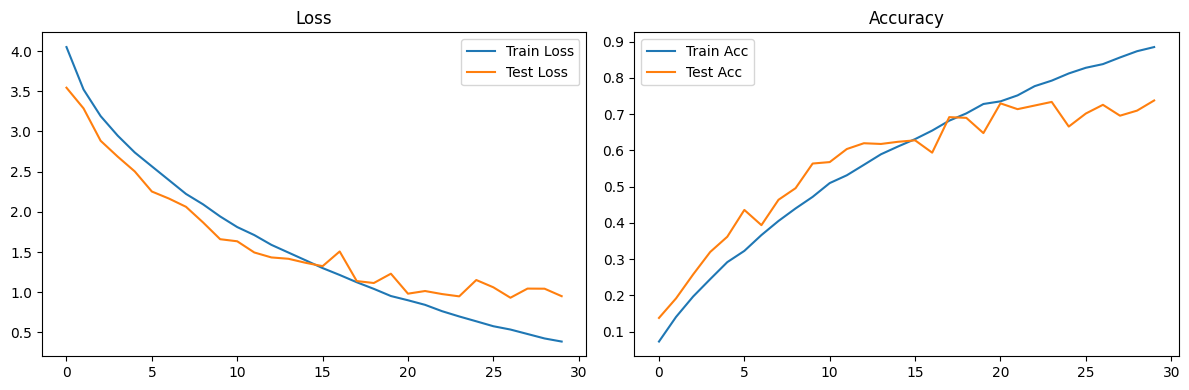

In [5]:
import torch
from torch.utils.data import DataLoader
from dataset import CustomImageDataset
from models import CNNWithResidual
from trainer import train_model
from utils import plot_training_history
import time

train_root = 'data/train'
test_root = 'data/valid'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 64
epochs = 30
num_classes = 100
kernel_size = 3
depth = 5

train_dataset = CustomImageDataset(train_root, is_aug=False)
val_dataset = CustomImageDataset(test_root, is_aug=False)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

print(f"\n=== Запуск  модели: kernel_size={kernel_size}, depth={depth}, epochs={epochs} ===")
model = CNNWithResidual(
    input_channels=3,
    num_classes=num_classes,
    kernel_size=kernel_size,
    num_layers=depth
).to(device)

start_time = time.time()

history = train_model(
    model=model,
    train_loader=train_loader,
    test_loader=val_loader,
    epochs=epochs,
    lr=0.001,
    device=device
)

end_time = time.time()
tm = end_time - start_time
print(f"Время обучения за {epochs} эпох: {tm:.2f} секунд")

plot_training_history(history, save_path=f"plots/cnn_with_res/res_with_5depth_3kernel/res_final_no_aug_30ep.png")


**Полученный результат для модели с глубиной 11 сверточных слоев и размером ядра 3 можно считать неплохим: наблюдается уверенный рост точности и**\
**снижение ошибки без явных признаков переобучения.**\
**Однако для дальнейшего улучшения качества стоит рассмотреть добавление аугментаций для увеличения разнообразия обучающих данных.**\
**Запусим на 60 эпохах, график - "plots\cnn_with_res\final_parametrs\res_final_with_aug_60ep.png"**


=== Запуск  модели: kernel_size=3, depth=5, epochs=60 === с аугментацией


100%|██████████| 8/8 [00:01<00:00,  5.00it/s]


Epoch 1/60:
Train Loss: 4.1008, Train Acc: 0.0636
Test Loss: 3.6215, Test Acc: 0.1060
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.72it/s]


Epoch 2/60:
Train Loss: 3.6948, Train Acc: 0.1137
Test Loss: 3.3478, Test Acc: 0.1780
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.93it/s]


Epoch 3/60:
Train Loss: 3.4619, Train Acc: 0.1551
Test Loss: 3.0607, Test Acc: 0.2000
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  6.49it/s]


Epoch 4/60:
Train Loss: 3.2748, Train Acc: 0.1877
Test Loss: 2.9996, Test Acc: 0.2140
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.89it/s]


Epoch 5/60:
Train Loss: 3.1126, Train Acc: 0.2149
Test Loss: 2.6932, Test Acc: 0.2960
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.02it/s]


Epoch 6/60:
Train Loss: 2.9507, Train Acc: 0.2430
Test Loss: 2.8509, Test Acc: 0.2820
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.11it/s]


Epoch 7/60:
Train Loss: 2.8256, Train Acc: 0.2780
Test Loss: 2.3975, Test Acc: 0.3820
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  6.01it/s]


Epoch 8/60:
Train Loss: 2.6973, Train Acc: 0.2991
Test Loss: 2.5045, Test Acc: 0.3740
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  6.14it/s]


Epoch 9/60:
Train Loss: 2.5841, Train Acc: 0.3305
Test Loss: 2.4314, Test Acc: 0.4140
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  6.05it/s]


Epoch 10/60:
Train Loss: 2.4736, Train Acc: 0.3565
Test Loss: 2.1781, Test Acc: 0.4220
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  6.15it/s]


Epoch 11/60:
Train Loss: 2.3899, Train Acc: 0.3717
Test Loss: 2.0578, Test Acc: 0.4460
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.40it/s]


Epoch 12/60:
Train Loss: 2.2948, Train Acc: 0.3887
Test Loss: 1.9598, Test Acc: 0.4700
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.33it/s]


Epoch 13/60:
Train Loss: 2.2017, Train Acc: 0.4155
Test Loss: 2.0147, Test Acc: 0.4760
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.88it/s]


Epoch 14/60:
Train Loss: 2.1295, Train Acc: 0.4265
Test Loss: 1.7959, Test Acc: 0.5280
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.83it/s]


Epoch 15/60:
Train Loss: 2.0581, Train Acc: 0.4475
Test Loss: 1.8589, Test Acc: 0.5140
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.27it/s]


Epoch 16/60:
Train Loss: 1.9498, Train Acc: 0.4712
Test Loss: 1.6802, Test Acc: 0.5560
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.59it/s]


Epoch 17/60:
Train Loss: 1.9096, Train Acc: 0.4868
Test Loss: 1.4496, Test Acc: 0.6040
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.64it/s]


Epoch 18/60:
Train Loss: 1.8145, Train Acc: 0.5029
Test Loss: 1.5194, Test Acc: 0.6040
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.91it/s]


Epoch 19/60:
Train Loss: 1.7561, Train Acc: 0.5256
Test Loss: 1.3502, Test Acc: 0.6140
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.54it/s]


Epoch 20/60:
Train Loss: 1.6882, Train Acc: 0.5412
Test Loss: 1.3765, Test Acc: 0.6100
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.56it/s]


Epoch 21/60:
Train Loss: 1.6384, Train Acc: 0.5470
Test Loss: 1.5277, Test Acc: 0.5960
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.55it/s]


Epoch 22/60:
Train Loss: 1.5760, Train Acc: 0.5660
Test Loss: 1.1669, Test Acc: 0.6700
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.62it/s]


Epoch 23/60:
Train Loss: 1.5104, Train Acc: 0.5798
Test Loss: 1.2713, Test Acc: 0.6400
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.57it/s]


Epoch 24/60:
Train Loss: 1.4760, Train Acc: 0.5863
Test Loss: 1.2520, Test Acc: 0.6520
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.57it/s]


Epoch 25/60:
Train Loss: 1.4148, Train Acc: 0.6067
Test Loss: 1.1006, Test Acc: 0.6720
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.57it/s]


Epoch 26/60:
Train Loss: 1.3734, Train Acc: 0.6160
Test Loss: 1.1042, Test Acc: 0.6880
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.23it/s]


Epoch 27/60:
Train Loss: 1.3208, Train Acc: 0.6248
Test Loss: 1.0694, Test Acc: 0.6760
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.63it/s]


Epoch 28/60:
Train Loss: 1.2873, Train Acc: 0.6353
Test Loss: 1.0705, Test Acc: 0.7080
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.71it/s]


Epoch 29/60:
Train Loss: 1.2554, Train Acc: 0.6440
Test Loss: 1.1633, Test Acc: 0.6720
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  6.04it/s]


Epoch 30/60:
Train Loss: 1.2033, Train Acc: 0.6546
Test Loss: 1.1443, Test Acc: 0.6960
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.65it/s]


Epoch 31/60:
Train Loss: 1.1664, Train Acc: 0.6697
Test Loss: 0.9956, Test Acc: 0.7260
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.67it/s]


Epoch 32/60:
Train Loss: 1.1266, Train Acc: 0.6780
Test Loss: 0.9169, Test Acc: 0.7220
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.44it/s]


Epoch 33/60:
Train Loss: 1.1078, Train Acc: 0.6883
Test Loss: 1.0703, Test Acc: 0.6980
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.50it/s]


Epoch 34/60:
Train Loss: 1.0765, Train Acc: 0.6920
Test Loss: 0.7678, Test Acc: 0.7780
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.51it/s]


Epoch 35/60:
Train Loss: 1.0340, Train Acc: 0.7017
Test Loss: 0.7446, Test Acc: 0.7740
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.56it/s]


Epoch 36/60:
Train Loss: 1.0082, Train Acc: 0.7054
Test Loss: 0.9573, Test Acc: 0.7200
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.64it/s]


Epoch 37/60:
Train Loss: 0.9850, Train Acc: 0.7151
Test Loss: 0.8032, Test Acc: 0.7800
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.64it/s]


Epoch 38/60:
Train Loss: 0.9672, Train Acc: 0.7189
Test Loss: 0.8578, Test Acc: 0.7640
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.62it/s]


Epoch 39/60:
Train Loss: 0.9246, Train Acc: 0.7335
Test Loss: 0.8263, Test Acc: 0.7700
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  6.28it/s]


Epoch 40/60:
Train Loss: 0.9069, Train Acc: 0.7339
Test Loss: 0.8698, Test Acc: 0.7540
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.41it/s]


Epoch 41/60:
Train Loss: 0.8817, Train Acc: 0.7396
Test Loss: 0.8997, Test Acc: 0.7600
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.58it/s]


Epoch 42/60:
Train Loss: 0.8393, Train Acc: 0.7497
Test Loss: 0.7989, Test Acc: 0.7900
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.58it/s]


Epoch 43/60:
Train Loss: 0.8353, Train Acc: 0.7506
Test Loss: 0.6974, Test Acc: 0.7980
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.62it/s]


Epoch 44/60:
Train Loss: 0.8150, Train Acc: 0.7579
Test Loss: 0.7161, Test Acc: 0.7980
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.70it/s]


Epoch 45/60:
Train Loss: 0.7790, Train Acc: 0.7711
Test Loss: 0.6662, Test Acc: 0.8140
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.53it/s]


Epoch 46/60:
Train Loss: 0.7618, Train Acc: 0.7720
Test Loss: 0.8524, Test Acc: 0.7620
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.57it/s]


Epoch 47/60:
Train Loss: 0.7591, Train Acc: 0.7752
Test Loss: 0.7632, Test Acc: 0.7900
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.63it/s]


Epoch 48/60:
Train Loss: 0.7310, Train Acc: 0.7856
Test Loss: 0.7201, Test Acc: 0.7820
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.66it/s]


Epoch 49/60:
Train Loss: 0.7060, Train Acc: 0.7901
Test Loss: 0.7040, Test Acc: 0.7960
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.65it/s]


Epoch 50/60:
Train Loss: 0.6870, Train Acc: 0.7903
Test Loss: 0.7332, Test Acc: 0.7940
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.78it/s]


Epoch 51/60:
Train Loss: 0.6775, Train Acc: 0.8006
Test Loss: 0.6032, Test Acc: 0.8160
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  6.82it/s]


Epoch 52/60:
Train Loss: 0.6718, Train Acc: 0.7995
Test Loss: 0.7776, Test Acc: 0.7980
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  6.67it/s]


Epoch 53/60:
Train Loss: 0.6482, Train Acc: 0.8017
Test Loss: 0.9395, Test Acc: 0.7640
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.78it/s]


Epoch 54/60:
Train Loss: 0.6496, Train Acc: 0.8036
Test Loss: 0.7370, Test Acc: 0.8000
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.82it/s]


Epoch 55/60:
Train Loss: 0.6309, Train Acc: 0.8066
Test Loss: 0.5719, Test Acc: 0.8360
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.84it/s]


Epoch 56/60:
Train Loss: 0.6052, Train Acc: 0.8159
Test Loss: 0.8200, Test Acc: 0.7740
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.86it/s]


Epoch 57/60:
Train Loss: 0.5748, Train Acc: 0.8292
Test Loss: 0.6771, Test Acc: 0.7900
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.90it/s]


Epoch 58/60:
Train Loss: 0.5857, Train Acc: 0.8213
Test Loss: 0.6106, Test Acc: 0.8200
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  5.86it/s]


Epoch 59/60:
Train Loss: 0.5611, Train Acc: 0.8276
Test Loss: 0.8354, Test Acc: 0.7880
--------------------------------------------------


100%|██████████| 8/8 [00:01<00:00,  4.47it/s]


Epoch 60/60:
Train Loss: 0.5489, Train Acc: 0.8340
Test Loss: 0.6786, Test Acc: 0.8200
--------------------------------------------------
Время обучения за 60 эпох: 6952.29 секунд


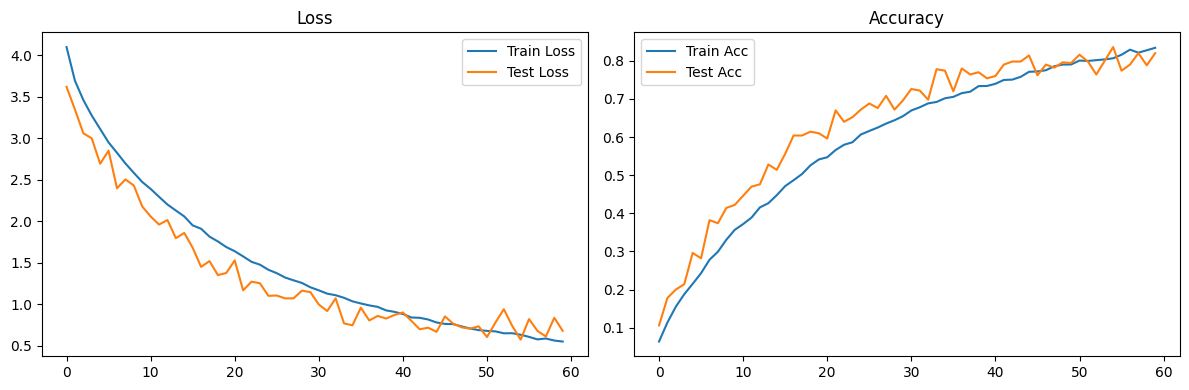

In [1]:
import torch
from torch.utils.data import DataLoader
from dataset import CustomImageDataset
from models import CNNWithResidual
from trainer import train_model
from utils import plot_training_history
import time

train_root = 'data/train'
test_root = 'data/test'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 64
epochs = 60
num_classes = 100
kernel_size = 3
depth = 5

train_dataset = CustomImageDataset(train_root, is_aug=True)
val_dataset = CustomImageDataset(test_root, is_aug=False)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

print(f"\n=== Запуск  модели: kernel_size={kernel_size}, depth={depth}, epochs={epochs} === с аугментацией")
model = CNNWithResidual(
    input_channels=3,
    num_classes=num_classes,
    kernel_size=kernel_size,
    num_layers=depth
).to(device)

start_time = time.time()

history = train_model(
    model=model,
    train_loader=train_loader,
    test_loader=val_loader,
    epochs=epochs,
    lr=0.001,
    device=device
)

end_time = time.time()
tm = end_time - start_time
print(f"Время обучения за {epochs} эпох: {tm:.2f} секунд")

plot_training_history(history, save_path=f"plots/cnn_with_res/res_with_5depth_3kernel/res_final_with_aug_30ep.png")